In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv("gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [29]:
df.shape

(847, 2)

In [30]:
print(f"Data range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Data range of gold prices available from - 1950-01 to 2020-07


In [31]:
date= pd.date_range (start= '1/1/1950', end='8/1/2020',freq="M")
date
                

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [32]:
df['month']=date
df.drop('Date',axis=1, inplace=True)
df= df.set_index('month')
df.head() 

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [33]:
print(df.columns)


Index(['Price'], dtype='object')


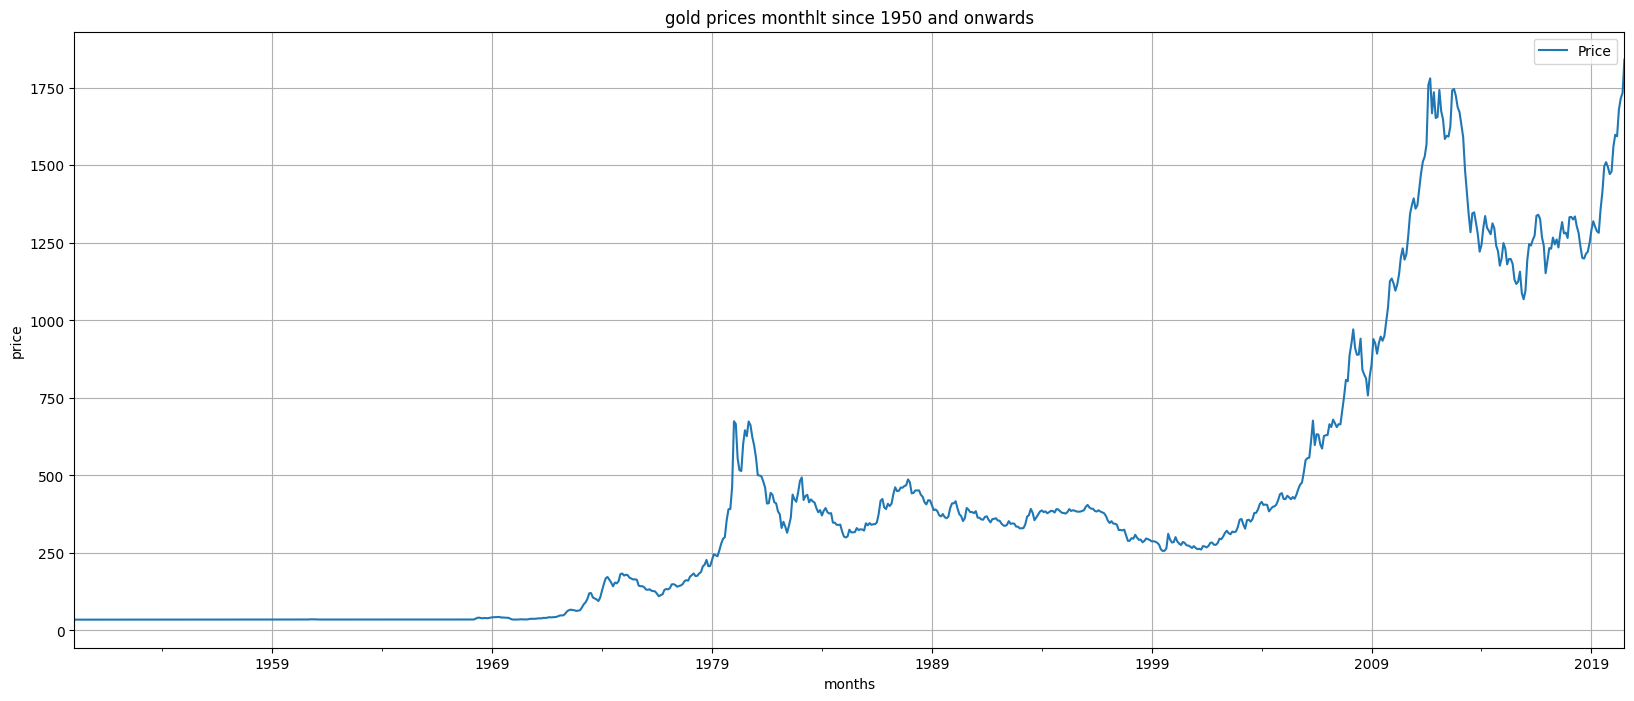

In [35]:
df.plot(figsize=(20,8))
plt.title("gold prices monthlt since 1950 and onwards")
plt.xlabel("months")
plt.ylabel("price")
plt.grid();

In [38]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


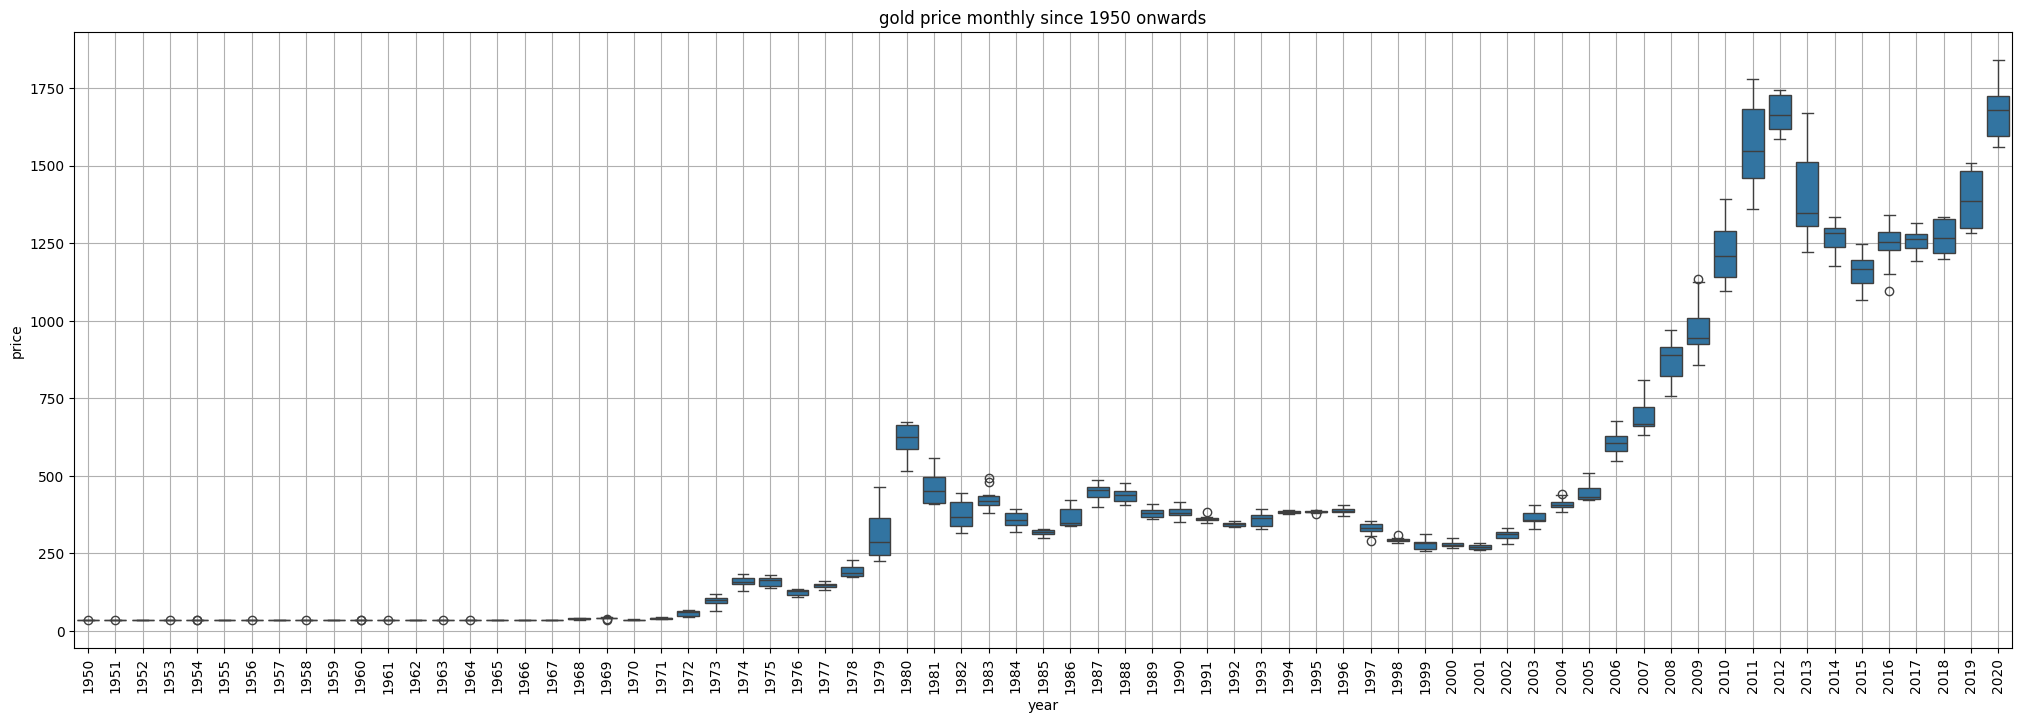

In [41]:
_, ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0],ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid();

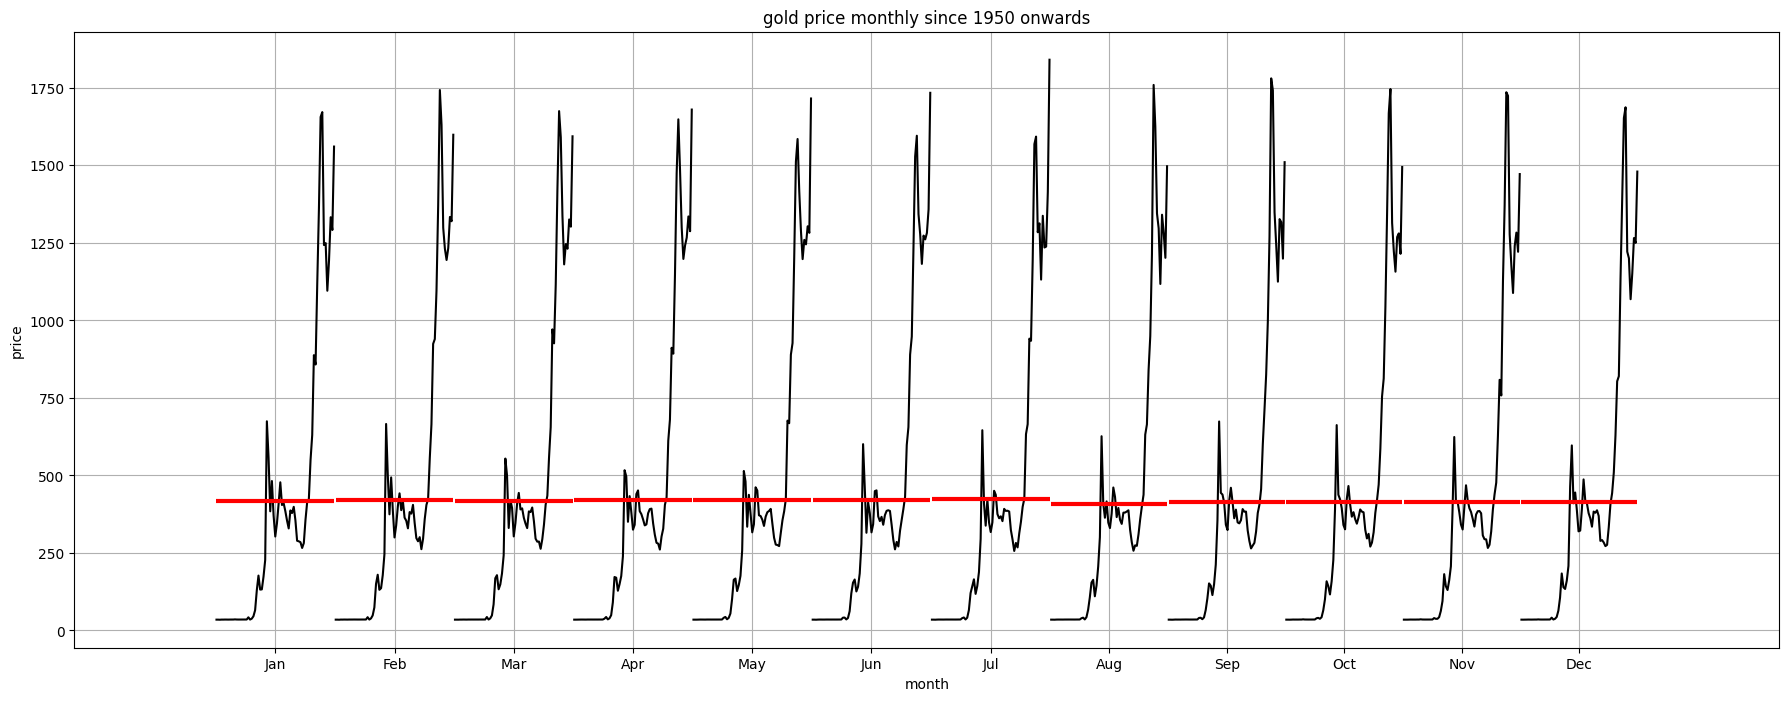

In [43]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(df,ylabel = 'gold price',ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid();

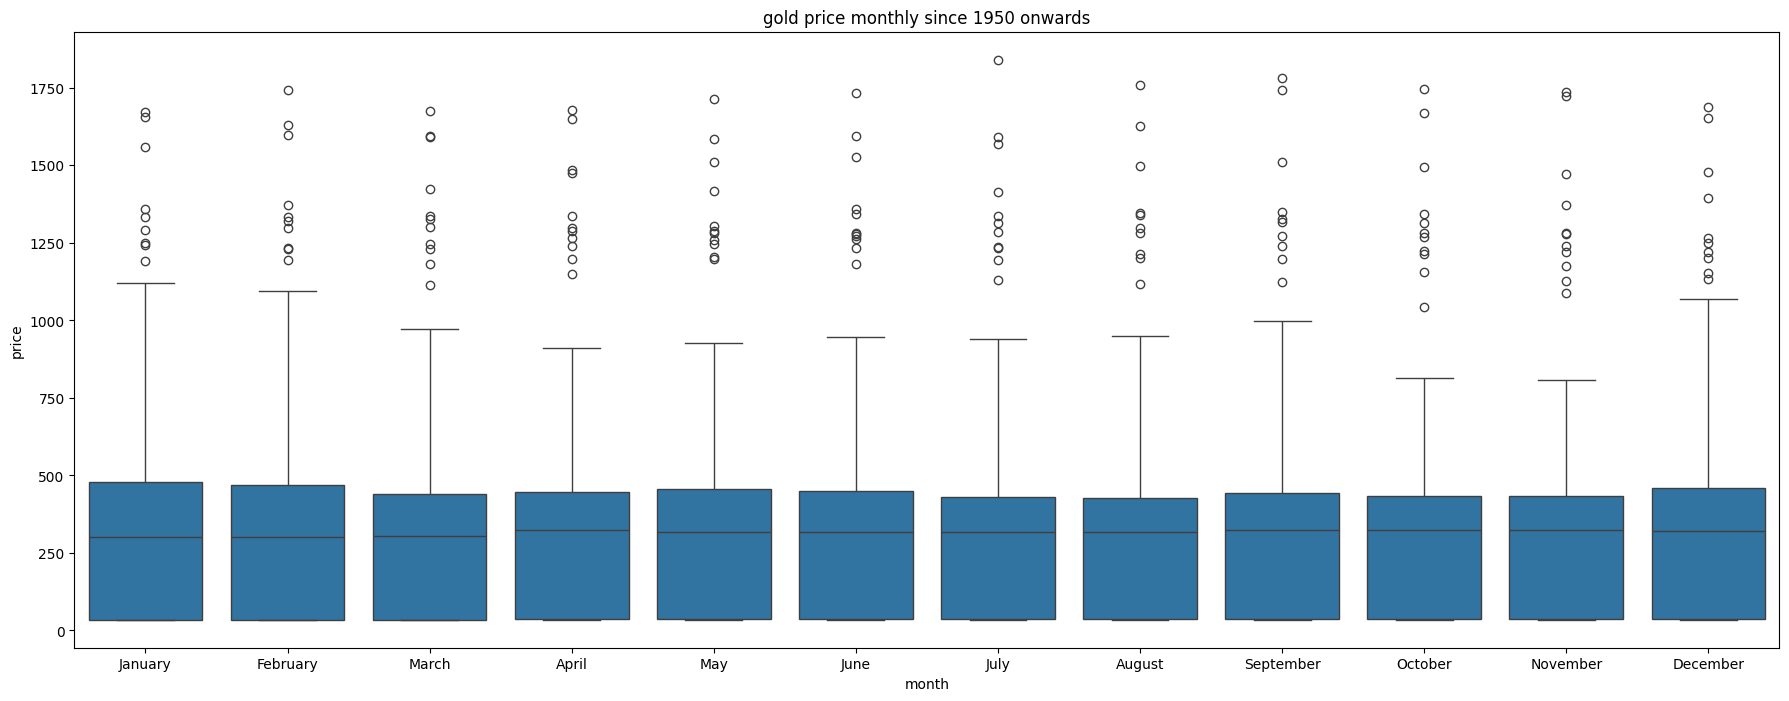

In [45]:
_, ax =plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel("month")
plt.ylabel('price')
plt.show();

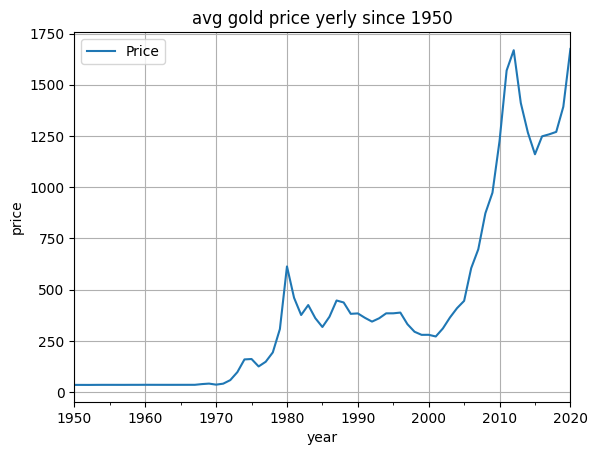

In [47]:
df_yearly_sum= df.resample('A').mean()
df_yearly_sum.plot();
plt.title("avg gold price yerly since 1950")
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

In [3]:
df_quarterly_sum = df.resample("Q").mean()
df_quarterly_sum.plot();
plt.title("avg gold price quarterly since 1950")
plt.xlabel("quarter")
plt.ylabel('price')
plt.show();

NameError: name 'df' is not defined